<a href="https://colab.research.google.com/github/martinalegre77/data_analytics/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***testing***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read data from file
csv_url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/main/medical_examination.csv"
df = pd.read_csv(csv_url, index_col=0)
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Add 'overweight' column
df["overweight"] = np.where(
    df['weight'] / (df['height']/100) **2 > 25,
    1,
    0,
)

# df['overweight'] = (df['weight'] / ((df['height']/100) **2)) # IMC
# maj_cond = df['overweight'] > 25
# min_cond = df['overweight'] <= 25
# df['overweight'] = df['overweight'] \
#                     .mask(maj_cond, 1) \
#                     .mask(min_cond, 0) \
#                     .astype(int)

df

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1


In [4]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)

# def apply_logic(value):
#     if value == 1:
#         return 0
#     else:
#         return 1
# # Select the columns to which the logic will be applied
# to_modify = ['cholesterol', 'gluc']
# # Apply function to selected columns
# df[to_modify] = df[to_modify].applymap(apply_logic)

df

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1


### Draw Categorical Plot

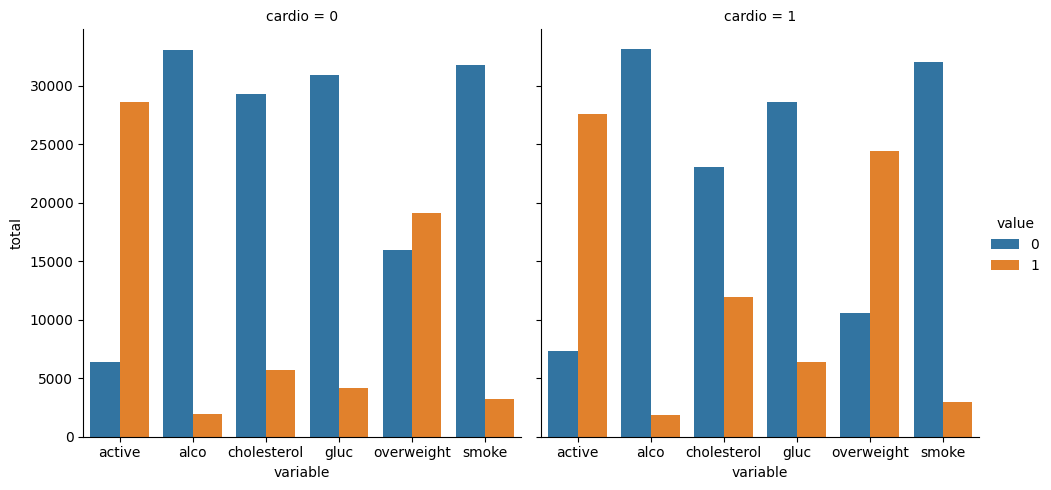

In [ ]:
# Draw Categorical Plot
def draw_cat_plot():
  pass

# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars = 'cardio', value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
# You will have to rename one of the columns for the catplot to work correctly.
df_cat = df_cat.reset_index() \
                            .groupby(['variable', 'cardio', 'value']) \
                            .agg('count') \
                            .rename(columns={'index': 'total'}) \
                            .reset_index()
 # Draw the catplot with 'sns.catplot()'
fig = sns.catplot(
        x="variable",
        y="total",
        col="cardio",
        hue="value",
        data=df_cat,
        kind="bar").fig

### Draw Heat Map

In [10]:
# Draw Heat Map
def draw_heat_map():
  pass

# Clean the data
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] < df['height'].quantile(0.0975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] < df['weight'].quantile(0.0975))
]

df_heat

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
197,18461,1,152,57.0,120,80,0,0,0,0,1,0,0
380,15229,1,150,55.0,120,70,0,0,0,0,0,0,0
403,21187,1,152,54.0,170,80,0,0,0,0,1,1,0
713,20449,1,151,53.0,120,80,0,0,0,0,1,0,0
760,21863,1,152,54.0,130,90,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98433,19595,2,150,53.0,140,80,1,0,0,0,0,1,0
99186,22538,1,152,55.0,170,90,1,1,0,0,0,1,0
99198,18090,1,152,52.0,120,90,0,0,0,0,1,0,0


In [13]:
# Calculate the correlation matrix
corr = df_heat.corr()

corr

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
age,1.000000,0.029196,0.028998,0.015199,0.314669,0.241651,0.102805,0.112142,0.035205,0.029134,-0.024247,0.355874,0.021315
sex,0.029196,1.000000,-0.056368,-0.062133,0.023042,0.043086,0.010183,-0.014215,0.219287,0.079482,0.013776,-0.079582,-0.043729
height,0.028998,-0.056368,1.000000,0.090854,0.007124,0.003870,0.053838,0.014915,-0.002219,0.023114,0.068879,0.024238,-0.222656
weight,0.015199,-0.062133,0.090854,1.000000,0.018667,0.044402,0.035236,-0.024213,-0.069336,0.009965,0.059255,0.040596,0.225515
ap_hi,0.314669,0.023042,0.007124,0.018667,1.000000,0.771657,0.147412,0.103721,0.014906,0.030924,-0.036373,0.449730,0.070344
ap_lo,0.241651,0.043086,0.003870,0.044402,0.771657,1.000000,0.123612,0.055404,0.054055,0.082866,0.009892,0.365075,0.049020
cholesterol,0.102805,0.010183,0.053838,0.035236,0.147412,0.123612,1.000000,0.338586,0.072313,0.042444,-0.002530,0.289931,0.033161
gluc,0.112142,-0.014215,0.014915,-0.024213,0.103721,0.055404,0.338586,1.000000,0.030794,0.035965,0.008498,0.138460,0.011557
smoke,0.035205,0.219287,-0.002219,-0.069336,0.014906,0.054055,0.072313,0.030794,1.000000,0.175453,0.050074,0.031626,-0.033821
alco,0.029134,0.079482,0.023114,0.009965,0.030924,0.082866,0.042444,0.035965,0.175453,1.000000,-0.006613,0.003976,-0.027411


In [14]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<Axes: >

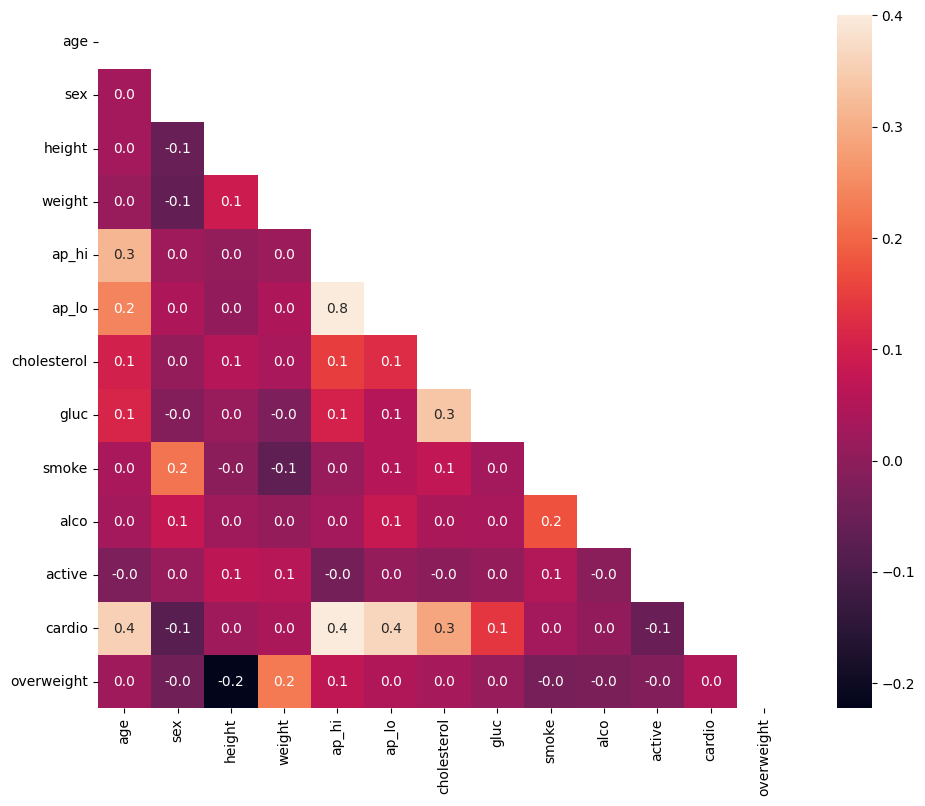

In [18]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(
        corr,
        mask=mask,
        vmax=0.4,
        square=True,
        fmt=".1f",
        annot=True,
    )

## **medical_data_visualizer.py**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv', index_col=0)

# Add 'overweight' column
df["overweight"] = np.where(
    df['weight'] / (df['height']/100) **2 > 25,
    1,
    0,
)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(
                    df,
                    id_vars = 'cardio',
                    value_vars =['cholesterol',
                    'gluc',
                    'smoke',
                    'alco',
                    'active',
                    'overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.reset_index() \
                   .groupby(['variable', 'cardio', 'value']) \
                   .agg('count') \
                   .rename(columns={'index': 'total'}) \
                   .reset_index()

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(
                      data=df_cat,
                      x="variable",
                      y="total",
                      col="cardio",
                      hue="value",
                      kind="bar").fig

    # Get the figure for the output
    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
                (df['ap_lo'] <= df['ap_hi']) &
                (df['height'] >= df['height'].quantile(0.025)) &
                (df['height'] < df['height'].quantile(0.0975)) &
                (df['weight'] >= df['weight'].quantile(0.025)) &
                (df['weight'] < df['weight'].quantile(0.0975))
                ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(
        corr,
        mask=mask,
        vmax=0.4,
        square=True,
        fmt=".1f",
        annot=True,
    )

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

## **Main**

In [ ]:
# This entrypoint file to be used in development. Start by reading README.md
import medical_data_visualizer
from unittest import main

# Test your function by calling it here
medical_data_visualizer.draw_cat_plot()
medical_data_visualizer.draw_heat_map()

# Run unit tests automatically
main(module='test_module', exit=False)

## **test_module**

In [ ]:
import unittest
import medical_data_visualizer
import matplotlib as mpl


# the test case
class CatPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = medical_data_visualizer.draw_cat_plot()
        self.ax = self.fig.axes[0]

    def test_line_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "variable"
        self.assertEqual(actual, expected, "Expected line plot xlabel to be 'variable'")
        actual = self.ax.get_ylabel()
        expected = "total"
        self.assertEqual(actual, expected, "Expected line plot ylabel to be 'total'")
        actual = []
        for label in self.ax.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
        self.assertEqual(actual, expected, "Expected bar plot secondary x labels to be 'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'")

    def test_bar_plot_number_of_bars(self):
        actual = len([rect for rect in self.ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])
        expected = 13
        self.assertEqual(actual, expected, "Expected a different number of bars chart.")


class HeatMapTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = medical_data_visualizer.draw_heat_map()
        self.ax = self.fig.axes[0]

    def test_heat_map_labels(self):
        actual = []
        for label in self.ax.get_xticklabels():
          actual.append(label.get_text())
        expected = ['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight']
        self.assertEqual(actual, expected, "Expected heat map labels to be 'id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'.")

    def test_heat_map_values(self):
        actual = [text.get_text() for text in self.ax.get_default_bbox_extra_artists() if isinstance(text, mpl.text.Text)]
        print(actual)
        expected = ['0.0', '0.0', '-0.0', '0.0', '-0.1', '0.5', '0.0', '0.1', '0.1', '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.2', '0.1', '0.0', '0.2', '0.1', '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.2', '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4', '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3', '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0', '0.0', '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0', '-0.0', '0.1', '-0.1', '-0.1', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']
        self.assertEqual(actual, expected, "Expected different values in heat map.")

if __name__ == "__main__":
    unittest.main()